In [3]:
# We are going to use the car libraries
library(car)

# And take a look at the Davis data set that has height and weight data (Actual and Reported)
# for men and women. Weight measurements are in kg and height in cm.

#View(Davis)
# Fixing a line where weight and height had been switched.
Davis$height[12] = 166
Davis$weight[12] = 57


Warning message:
"package 'car' was built under R version 3.4.3"

### Question 1
What is the sample size of this data set? (1pt)

In [20]:
n = nrow(Davis)
#200

### Question 2
Plot this data on a scatterplot with weight on the y axis and height on the x axis. (1 pt)

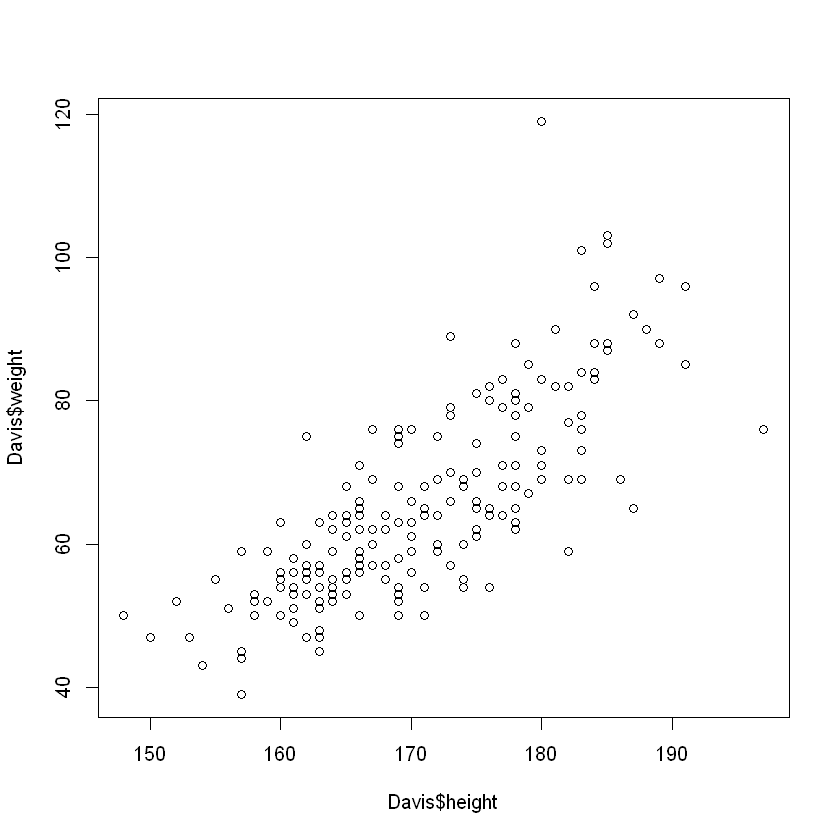

In [5]:
plot(x=Davis$height, y=Davis$weight)


### Question 3
Make two linear models that predicts weight from height one for women and one for men.
To select men or women use either the subset command or logical indexing.
Show the summary output of these two models.  What can you say in english about the slopes of these two models? (2 pt)

In [6]:
males = Davis[Davis$sex=="M",]
females = Davis[Davis$sex=="F",]

In [7]:
male_mod = lm(weight ~ height, data=males)
female_mod = lm(weight ~ height, data=females)

In [8]:
summary(male_mod)


Call:
lm(formula = weight ~ height, data = males)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.869  -6.893  -0.897   6.114  41.122 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -101.3301    29.8617  -3.393  0.00105 ** 
height         0.9956     0.1676   5.939 5.92e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.07 on 86 degrees of freedom
Multiple R-squared:  0.2908,	Adjusted R-squared:  0.2826 
F-statistic: 35.27 on 1 and 86 DF,  p-value: 5.922e-08


In [9]:
summary(female_mod)


Call:
lm(formula = weight ~ height, data = females)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.0893  -3.4811  -0.9006   3.4246  19.7973 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -45.67296   16.34139  -2.795  0.00613 ** 
height        0.62269    0.09915   6.280 6.92e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.912 on 110 degrees of freedom
Multiple R-squared:  0.2639,	Adjusted R-squared:  0.2572 
F-statistic: 39.44 on 1 and 110 DF,  p-value: 6.922e-09


For both of these models as height increases, so does weight. The slope of the model for men is steeper than that of women
This means that as men gain an additional unit of weight they gain more units of weight than women do
For men they gain .99 units of weight for each unit of height, while women gain .62 units of weight for each unit of height

### Question 3b
Run a single model using lm() command that also give you these two lines
Check to verify that you get the same results for the intercept and slope of these two lines.
Show me how you checked.  (2 pts)

In [10]:
int_mod = lm(weight ~ height*sex, data=Davis)
summary(int_mod)


Call:
lm(formula = weight ~ height * sex, data = Davis)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.869  -4.835  -0.897   4.429  41.122 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -45.6730    22.1342  -2.063   0.0404 *  
height        0.6227     0.1343   4.637 6.46e-06 ***
sexM        -55.6571    32.4597  -1.715   0.0880 .  
height:sexM   0.3729     0.1892   1.971   0.0502 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.007 on 196 degrees of freedom
Multiple R-squared:  0.6442,	Adjusted R-squared:  0.6388 
F-statistic: 118.3 on 3 and 196 DF,  p-value: < 2.2e-16


In [11]:
#women is baseline - intercept -45, coef .62

#men is not -- intercept is 
-55.65 + -45.67
#-101
#coefficient is
.622+.3729
#.9949

#this is roughly identical to the coefficients previously

[1] -101.32

[1] 0.9949

In [12]:
male_int = coef(male_mod)[1]
male_coef = coef(male_mod)[2]

In [13]:
female_int = coef(female_mod)[1]
female_coef = coef(female_mod)[2]

In [14]:
#coefficients of the interaction model
coef(int_mod)

(Intercept)      height        sexM height:sexM 
-45.6729625   0.6226893 -55.6570877   0.3729088

In [15]:
#Compare to coefficients of the two models seperately, adjusted for new baseline
c(female_int, female_coef, male_int-female_int, male_coef-female_coef)

(Intercept)      height (Intercept)      height 
-45.6729625   0.6226893 -55.6570877   0.3729088

### Question 4
Now, plot the regression lines from your models on your scatter plot. 
Use different colors for the two lines. (1 pt.)

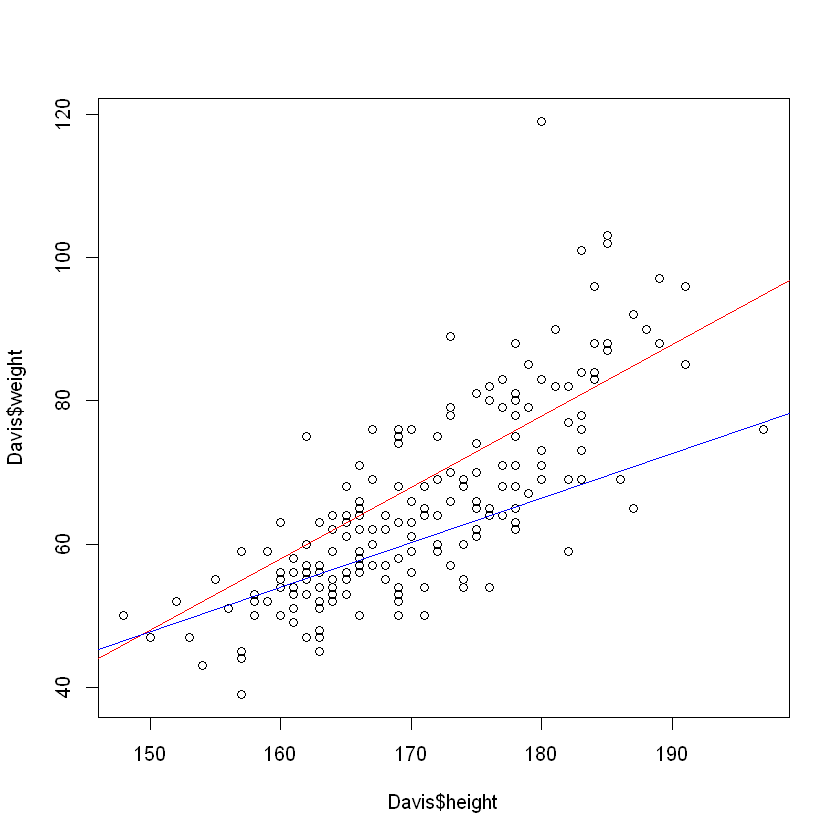

In [16]:
plot(x=Davis$height, y=Davis$weight)
abline(male_mod, col='red')
abline(female_mod, col='blue')

### Question 5
What is the predicted weight of a 170 cm women? (1 pt)

In [17]:
female_int + 170*female_coef

(Intercept) 
   60.18421

60.18 kg

### Question 6. 
Using a for loop calculate the mean and the standard error of weight for random samples of 16, 25, 36, 42, 64, 81, 100, 144 and 169.
Plot the standard error as a function of the sample size.  On the same plot add the standard error that you would expect from the standard deviation obtained from the entire data set. (Start by writing down the equation for the standard error of the mean from the standard deviation) (2 pt)

In [24]:
samp.Means  <- array(0,9)
samp.n <- array(0,9)
samp.SE <- array(0,9)
samp.SE.All <- array(0,9)
weight.sd <- sd(Davis$weight)


In [25]:
sample(200,16)

[1]  85 120  27 169   8 104  79  19  84 124  92  30 148  49  21 137

In [22]:
for (i in 4:12) {
  n.test <- i*i #this is a way to get 16, 25, 36 etc
  samp.ind <- sample(n, n.test) #this is saying out of the range 1-200, sample n test items
  
  samp.n[i-3] <- n.test # the -3 just adjusts it so i works
  samp.Means[i-3] <- mean(Davis$weight[samp.ind]) #this takes the mean at that point
  samp.SE[i-3] <- sd(Davis$weight[samp.ind])/sqrt(n.test) #this finds the standard error at that point
  samp.SE.All[i-3] <- weight.sd/sqrt(n.test) #this is the same, but with standard deviation taken from the whole data set
}

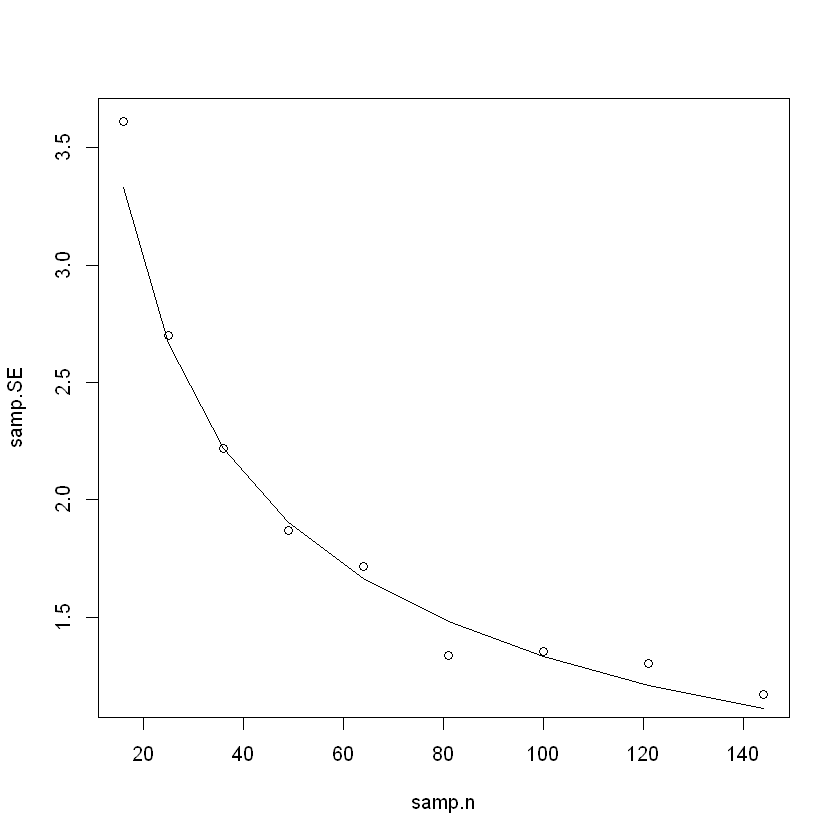

In [23]:
plot(samp.n, samp.SE)
lines(samp.n, samp.SE.All)


### Question 6, rewritten

In [33]:
sample_means = 0:9
sample_n = c(6,25,36,42,64,81,100,144,169)
sample_SE = 0:9
sample_SE_allSD = 0:9
weight_sd = sd(Davis$weight)

In [36]:
for(i in 1:length(sample_n)){
    temp_sample = sample(Davis$weight, sample_n[i])
    
    sample_means[i] = mean(temp_sample)
    sample_SE[i] = sd(temp_sample)/sqrt(sample_n[i])
    sample_SE_allSD[i] = weight_sd/sqrt(sample_n[i])
}

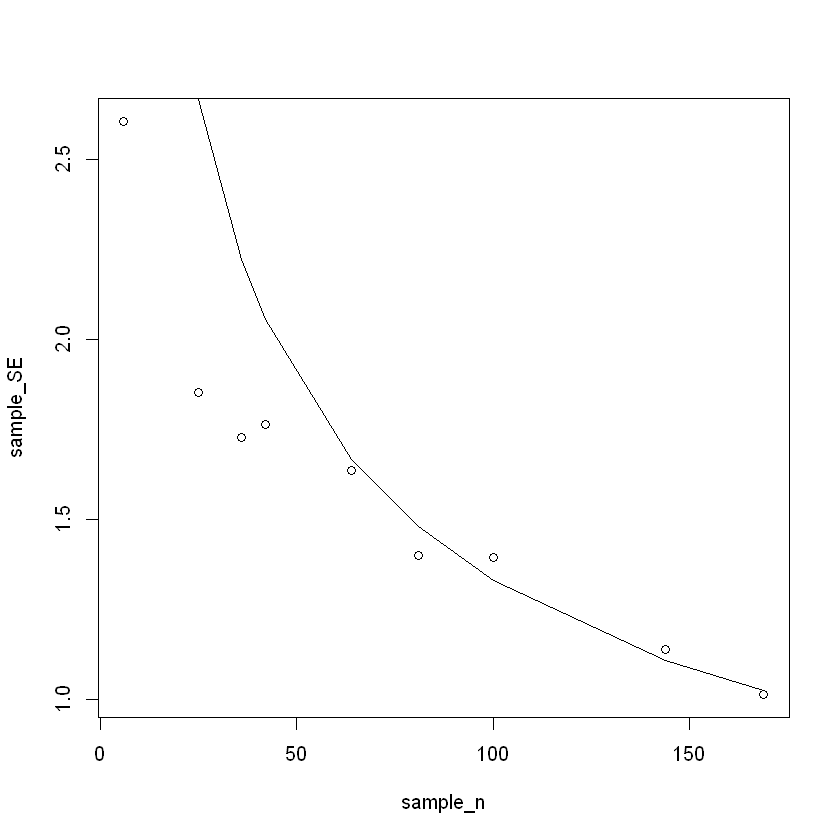

In [39]:
plot(sample_n, sample_SE)
lines(sample_n, sample_SE_allSD)